<a href="https://colab.research.google.com/github/Aakriti555/Nammi-assignment/blob/main/left_knee_Bone_Segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib # common way of importing nibabel

In [3]:
mri_file = '/content/3702_left_knee.nii.gz'
img = nib.load(mri_file)

In [4]:
print(type(img))


<class 'nibabel.nifti1.Nifti1Image'>


In [5]:
print(img.shape)

(512, 512, 216)


In [6]:
# here, we're storing the header attribute in a new variable, hdr, for easy of use
hdr = img.header

In [7]:
hdr.get_zooms()  # it's a 1x1x1 mm MRI file!

(np.float32(0.869141), np.float32(0.869141), np.float32(2.0))

In [8]:
hdr.get_xyzt_units()


('mm', 'unknown')

In [10]:
img_data = img.get_fdata()
print(type(img_data))  # it's a numpy array!
print(img_data.shape)

<class 'numpy.ndarray'>
(512, 512, 216)


In [11]:
print(img_data)

[[[-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  ...
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]]

 [[-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  ...
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]]

 [[-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  ...
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]
  [-1000. -1000. -1000. ... -1000. -1000. -1000.]]

 ...

 [[-3024. -3024. -3024. ... -3024. -3024. -3024.]
  [-3024. -3024. -30

In [12]:
mid_slice_x = img_data[:,255, :]
print(mid_slice_x.shape)

(512, 216)


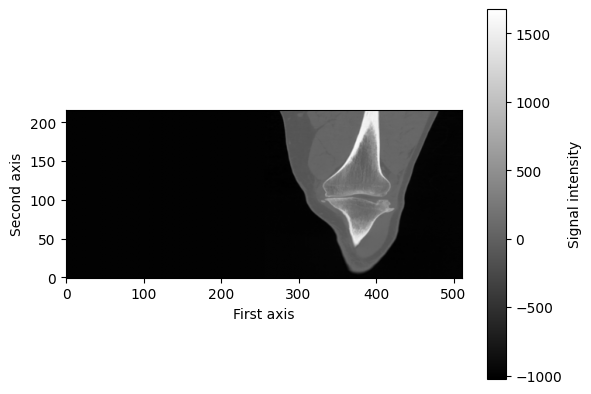

In [13]:
# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

MRI shape: (512, 512, 216)
Voxel dimensions: (np.float32(0.869141), np.float32(0.869141), np.float32(2.0))
Units: ('mm', 'unknown')


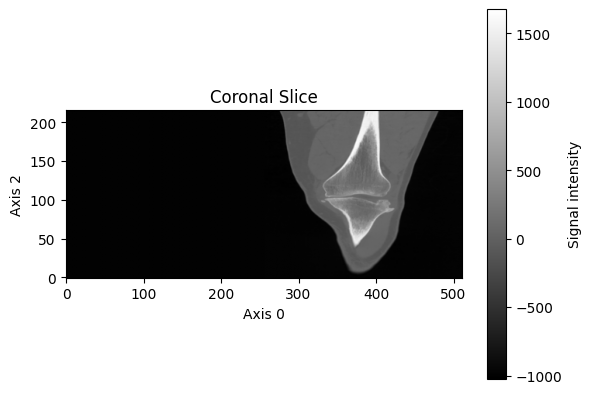

In [17]:
from scipy.ndimage import label

# Load MRI
mri_file = '/content/3702_left_knee.nii.gz'
img = nib.load(mri_file)
img_data = img.get_fdata()

print("MRI shape:", img_data.shape)
print("Voxel dimensions:", img.header.get_zooms())
print("Units:", img.header.get_xyzt_units())

# Visualize a coronal slice
mid_slice_x = img_data[:, 255, :]
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.title("Coronal Slice")
plt.xlabel('Axis 0')
plt.ylabel('Axis 2')
plt.colorbar(label='Signal intensity')
plt.show()


MRI shape: (512, 512, 216)
Voxel dimensions: (np.float32(0.869141), np.float32(0.869141), np.float32(2.0))
Units: ('mm', 'unknown')


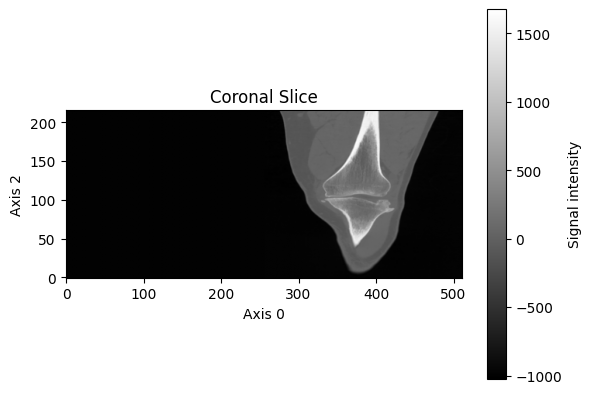

In [18]:
from scipy.ndimage import label

# Load MRI
mri_file = '/content/3702_left_knee.nii.gz'
img = nib.load(mri_file)
img_data = img.get_fdata()

print("MRI shape:", img_data.shape)
print("Voxel dimensions:", img.header.get_zooms())
print("Units:", img.header.get_xyzt_units())

# Visualize a coronal slice
mid_slice_x = img_data[:, 255, :]
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.title("Coronal Slice")
plt.xlabel('Axis 0')
plt.ylabel('Axis 2')
plt.colorbar(label='Signal intensity')
plt.show()

Found 511 connected components.


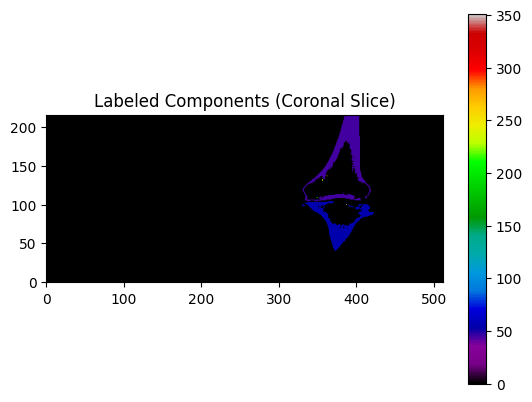

In [19]:
# Apply threshold to segment bones (adjust threshold as needed)
threshold = 350 #350 sweet spot
bone_mask = img_data > threshold

# Label connected components
labeled_array, num_features = label(bone_mask)
print(f"Found {num_features} connected components.")

# Visual check (optional)
plt.imshow(labeled_array[:, 255, :].T, cmap='nipy_spectral', origin='lower')
plt.title("Labeled Components (Coronal Slice)")
plt.colorbar()

plt.show()

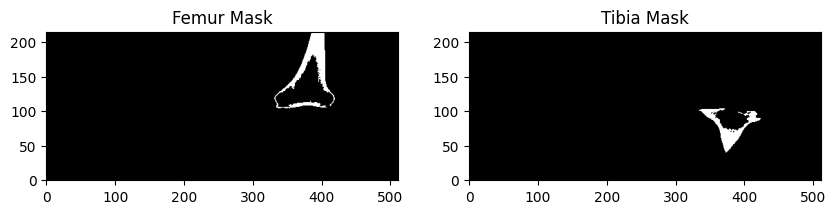

In [20]:
# Get the sizes of each component
component_sizes = [(labeled_array == i).sum() for i in range(1, num_features + 1)]
sorted_indices = np.argsort(component_sizes)[::-1]  # Descending order

# Get femur and tibia masks (first 2 largest components)
femur_mask = labeled_array == (sorted_indices[0] + 1)
tibia_mask = labeled_array == (sorted_indices[1] + 1)

# Optional visualization
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(femur_mask[:, 255, :].T, cmap='gray', origin='lower')
plt.title('Femur Mask')

plt.subplot(1, 2, 2)
plt.imshow(tibia_mask[:, 255, :].T, cmap='gray', origin='lower')
plt.title('Tibia Mask')
plt.show()